In [1]:
import pandas as pd

directory = 'Ver5_ORG'

data = pd.read_csv('../../evaluation/' + directory + '/result.csv', header=None)
K = data[0][:]
N = len(K)
Ver = ['' for _ in range(N)]
Met = [[0 for _ in range(N)] for _ in range(3)]

for i in range(N):
    Ver[i] = K[i]
    Met[0][i] = data[1][i]
    Met[1][i] = data[2][i]
    Met[2][i] = data[3][i]

data = pd.read_csv('../../time/' + directory + '/time.csv', header=None)
time = {}
Time = [[0 for _ in range(N)] for _ in range(5)]

for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]
    
for i, j in enumerate(Ver):
    for k in range(5):
        Time[k][i] = time[j][k]
    print(j + ': ' + str(time[j]))

Ver5_ORG: [40.81074554141201, 113.2994477111514, 1.575439283163192, 195.61493750846032, 0.0076105098913211]


In [2]:
data = pd.read_csv('../../evaluation/Ver4_ORG/result.csv', header=None)
for i in [0]:
    Ver.insert(0, data[0][i])
    for j in range(3):
        Met[j].insert(0, data[j+1][i])

data = pd.read_csv('../../time/Ver4_ORG/time.csv', header=None)
for i in range(len(data[0])):
    time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

for i in [0]:
    j = Ver[i]
    for k in range(5):
        Time[k].insert(0, time[j][k])

In [3]:
if not directory == 'Ver3_1_2-4_0-0.2_0-1':
    data = pd.read_csv('../../evaluation/Ver3_1_2-4_0-0.2_0-1/result.csv', header=None)
    for i in [9, 1, 0]:
        Ver.insert(0, data[0][i])
        for j in range(3):
            Met[j].insert(0, data[j+1][i])

    data = pd.read_csv('../../time/Ver3_1_2-4_0-0.2_0-1/time.csv', header=None)
    for i in range(len(data[0])):
        time[data[0][i]] = [data[1][i], data[2][i], data[3][i], data[4][i], data[5][i]]

    for i in range(2, -1, -1):
        j = Ver[i]
        for k in range(5):
            Time[k].insert(0, time[j][k])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

def plot_result(Ver, Met, Time, ext, Name=''):
    N = len(ext)
    Met, Time = np.array(Met), np.array(Time)
    Ver, Met, Time = [Ver[i] for i in ext], Met[:,ext], Time[:,ext]
    idx = np.arange(N) * 4
    bar_width = 0.8
    Bot = [[0 for _ in range(N)] for _ in range(5)]
    for i in range(4):
        for j in range(N):
            if i == 0:
                Bot[i + 1][j] = Time[i][j]
            else:
                Bot[i + 1][j] = Bot[i][j] + Time[i][j]
    fig, ax1 = plt.subplots(figsize=(15, 10))
    plt.grid(True)
    fig.set_facecolor('white')
    b1 = plt.bar(idx, Met[0], bar_width, label='HMean', color='black', zorder=10)
    b2 = plt.bar(idx + bar_width, Met[1], bar_width, label='Precision', color='red', zorder=10)
    b3 = plt.bar(idx + 2*bar_width, Met[2], bar_width, label='Recall', color='blue', zorder=10)
    plt.xticks(idx + 3/2*bar_width, Ver, rotation=-45)
    plt.ylabel('[%]')
    plt.ylim([97, 98])
    ax2 = ax1.twinx()
    b4 = ax2.bar(idx + 3*bar_width, Time[0], label='Data handling\n(Mask, GPU to CPU)', color='silver')
    b5 = ax2.bar(idx + 3*bar_width, Time[1], bottom=Bot[1], label='PA (Pixel Aggregation)', color='indigo')
    b6 = ax2.bar(idx + 3*bar_width, Time[2], bottom=Bot[2], label='Resizing', color='magenta')
    b7 = ax2.bar(idx + 3*bar_width, Time[3], bottom=Bot[3], label='Boxgen', color='olive')
    b8 = ax2.bar(idx + 3*bar_width, Time[4], bottom=Bot[4], label='Data handling (Output)', color='cyan')
    plt.ylim([0, 1500])
    plt.ylabel('Time [ms]')
    bs = [b1, b2, b3, b4, b5, b6, b7, b8]
    labels = [b.get_label() for b in bs]
    plt.legend(bs, labels, loc='upper right', bbox_to_anchor=(1.41, 1.02))
    if Name != '':
        plt.savefig(Name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.3, transparent=False)

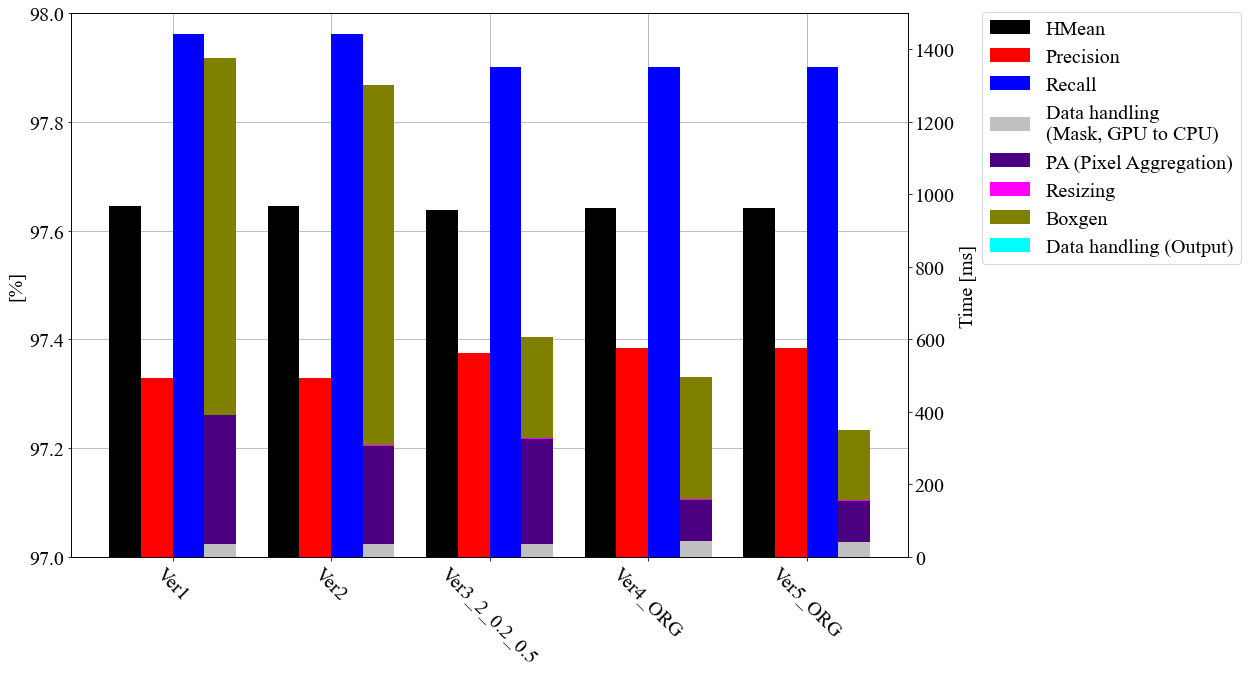

In [5]:
plot_result(Ver, Met, Time, [0, 1, 2, 3, 4], 'Ver5')